# Домашее задание №3

In [1]:
# перед началом выполнения подключим нужные библиотеки

import pandas as pd
%matplotlib inline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
import warnings
warnings.filterwarnings("ignore")

## Задание 1

В файле Worldbank_tech.xlsx содержаться данные Всемирного банка по ряду показателей по странам. В файле следующие переменные:
    
    - country_name: Country Name
    - country_code: Country Code
    - internet: Internet users (per 100 people)
    - secure: Secure Internet servers (per 1 million people)
    - export: Communications, computer, etc. (% of service exports)
    - import: Communications, computer, etc. (% of service imports)
    - telephone: Fixed telephone subscriptions (per 100 people)
    - hightech: High-technology exports (current US$)
    - mobile: Mobile cellular subscriptions (per 100 people)
    

Проведите иерархический кластерный анализ данных с использованием не менее 4-х метрических переменных. Выполните следующие пункты:

        1.	Обоснуйте выбор переменных кластеризации.

        2.	Выберите оптимальный метод иерархической кластеризации и обоснуйте свой выбор.

        3.	Создайте дендрограмму, опишите её.

        4.	Определите число кластеров, объясните своё решение.

        5.	Опишите получившиеся кластеры на основе описательной статистки. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.

        6.	Дайте названия кластерам и обоснуйте их.

        7.	Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?

Сначала посмотрим на наши данные

In [2]:
df1 = pd.read_excel('Worldbank_tech.xlsx')
df1

,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile
0,Afghanistan,AFG,8.260000,1.414229,72.652794,9.053154,0.343677,NaN,61.577619
1,Albania,ALB,63.252933,37.727137,25.303169,11.124101,7.091628,15123662.0,106.380207
2,Algeria,DZA,38.200000,2.546228,59.256825,58.012028,8.041628,2449466.0,113.031094
3,American Samoa,ASM,NaN,72.022759,NaN,NaN,18.005690,NaN,NaN
4,Andorra,ADO,96.910000,1631.830630,NaN,NaN,47.992588,NaN,88.123533
...,...,...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),VIR,54.839137,453.781837,NaN,NaN,71.090491,NaN,NaN
213,West Bank and Gaza,WBG,57.424192,5.653368,44.171827,NaN,8.936393,5099724.0,77.624612
214,"Yemen, Rep.",YEM,25.099514,0.633567,56.462032,NaN,4.679835,2946931.0,67.980973
215,Zambia,ZMB,21.000000,4.317851,8.549899,NaN,0.748505,36503179.0,74.471778



Нам нужно выбрать 4 переменные для кластеризации, которые будут не сильно коррелировать друг с другом (вообще тут все переменные коррелируют друг с другом). Какие метрические переменные есть? Это:
1. internet
2. secure
3. export
4. import
5. telephone
6. hightech
7. mobile

Будем кластеризовать по технологическому развитию стран, поэтому рассмотрим такие переменные:
1. internet (так как данный показатель демонстрирует количество интернет-пользователей на 100 человек)
2. import (так как данный показатель демонстрирует импорт технологической продукции)
3. hightech (так как данный показатель демонстрирует экспорт высоких технологий в американских долларах)
4. mobile (так как данный показатель демонстрирует количество мобильных подписок на 100 человек)

Далее нам нужно проверить данные на корреляцию и стандартизировать шкалы, так как они различаются в исходных данных. Для начала проверим, распределены ли данные нормально, чтобы затем выбрать подходящий критерий для проверки корреляции

<font color='red'> вывела бы хитмап корреляций, а то не видно же где ты на что и как смотришь</font>

In [3]:
# импортируем, чтобы потом делать проверку на нормальность
from scipy import stats

# количество значений
df1['internet'].dropna().shape

(202,)

In [4]:
# количество уникальных значений
df1['internet'].dropna().unique().shape

(198,)

Так как количесто not-null значений больше 50, то воспользуемся критерием Колмогорова-Смирнова для проверки нормальности распределения

In [5]:
# H0 - значения столбца internet распределены нормально
stats.kstest(df1['internet'].dropna(), 'norm', args=(df1['internet'].mean(), df1['internet'].std()))
# pvalue < 0.05 => H0 опровергнут => значения столбца internet не распределены нормально

KstestResult(statistic=0.1088666685546969, pvalue=0.01537154227089266, statistic_location=22.351404582536, statistic_sign=1)

In [6]:
# количество значений
df1['import'].dropna().shape

(123,)

In [7]:
# Количество уникальных значений
df1['import'].dropna().unique().shape

(123,)

Так как количесто not-null значений больше 50, то воспользуемся критерием Колмогорова-Смирнова для проверки нормальности распределения

In [8]:
# H0 - значения столбца import распределены нормально
stats.kstest(df1['import'].dropna(), 'norm', args=(df1['import'].mean(), df1['import'].std()))
# pvalue > 0.05 => H0 подтверждён => значения столбца import распределены нормально

KstestResult(statistic=0.04525457990092588, pvalue=0.9528462567028891, statistic_location=22.56203597722612, statistic_sign=1)

In [9]:
# количество значений
df1['hightech'].dropna().shape

(135,)

In [10]:
# Количество уникальных значений
df1['hightech'].dropna().unique().shape

(131,)

Так как количесто not-null значений больше 50, то воспользуемся критерием Колмогорова-Смирнова для проверки нормальности распределения

In [11]:
# H0 - значения столбца hightech распределены нормально
stats.kstest(df1['hightech'].dropna(), 'norm', args=(df1['hightech'].mean(), df1['hightech'].std()))
# pvalue < 0.05 => H0 опровергнут => значения столбца hightech не распределены нормально

KstestResult(statistic=0.3940985318749621, pvalue=2.0663807688315873e-19, statistic_location=0.0, statistic_sign=-1)

In [12]:
# количество значений
df1['mobile'].dropna().shape

(204,)

In [13]:
# Количество уникальных значений
df1['mobile'].dropna().unique().shape

(204,)

Так как количесто not-null значений больше 50, то воспользуемся критерием Колмогорова-Смирнова для проверки нормальности распределения

In [14]:
# H0 - значения столбца mobile распределены нормально
stats.kstest(df1['mobile'].dropna(), 'norm', args=(df1['mobile'].mean(), df1['mobile'].std()))
# pvalue >= 0.05 => H0 подтверждён => значения столбца mobile распределены нормально

KstestResult(statistic=0.06074503358473482, pvalue=0.4222850957424237, statistic_location=133.467550086318, statistic_sign=1)

<font color='red'> сделала бы это все в цикле, че тут куча ячеек одинаковых, тяжело читать</font>

У всех переменных большинство данных уникально, при этом mobile и import распределены нормально, поэтому для проверки корреляций с ними воспользуемся критерием Пирсона, в остальных случаях воспользуемся критерием Спирмена

In [15]:
# Почистим None
df1 = df1.dropna(subset=['internet', 'import', 'mobile', 'hightech'])

In [16]:
# Пара import, mobile
stats.pearsonr(df1['import'], df1['mobile'])
# pvalue > 0.05 => корреляции нет

PearsonRResult(statistic=0.11148719872137469, pvalue=0.2719318718989761)

In [17]:
# Пара import, internet
stats.spearmanr(df1['import'], df1['internet'])
# pvalue < 0.05, statistic = 0.42 < 0.7 => Корреляция есть, но не сильная => соотвествует критерию

SignificanceResult(statistic=0.4243501815182046, pvalue=1.2014221126659732e-05)

In [18]:
# Пара internet, hightech
stats.spearmanr(df1['internet'], df1['hightech'])
# pvalue < 0.05, statistic = 0.54 < 0.7 => Корреляция есть, но не сильная => соотвествует критерию

SignificanceResult(statistic=0.5388968255543788, pvalue=8.702832908459124e-09)

In [19]:
# Пара internet, mobile
stats.spearmanr(df1['internet'], df1['mobile'])
# pvalue < 0.05, statistic = 0.32 < 0.7 => Корреляция есть, но не сильная => соотвествует критерию

SignificanceResult(statistic=0.3178560164316593, pvalue=0.0013457727615147832)

In [20]:
# Пара import, hightech
stats.spearmanr(df1['import'], df1['hightech'])
# pvalue < 0.05, statistic = 0.32 < 0.7 => Корреляция есть, но не сильная => соотвествует критерию

SignificanceResult(statistic=0.3237269477915874, pvalue=0.001080722894099353)

In [21]:
# Пара hightech, mobile
stats.spearmanr(df1['hightech'], df1['mobile'])
# pvalue < 0.05, statistic = 0.26 < 0.7 => Корреляция есть, но не сильная => соотвествует критерию

SignificanceResult(statistic=0.25581021412240135, pvalue=0.01059967452331214)

<font color='red'> ну вообще пара ```internet-hightech``` как-то сильновато коррелирует, там есть и поменьше + надо корреляцию всех со всеми смотреть </font>

Ура, значит выбранные переменные подойдут нам для кластеризации!

In [22]:
# И выполним стандартизацию шкал напоследок
df1['internet'] = (df1['internet'] - df1['internet'].mean()) / (df1['internet'].std())
df1['import'] = (df1['import'] - df1['import'].mean()) / (df1['import'].std())
df1['hightech'] = (df1['hightech'] - df1['hightech'].mean()) / (df1['hightech'].std())
df1['mobile'] = (df1['mobile'] - df1['mobile'].mean()) / (df1['mobile'].std())

### Выберем подходящий метод для кластеризации
Существуют следующие методы:
1. Ближайший сосед
2. Дальний сосед
3. Межгрупповые связи
4. Центроидная кластеризация
5. Метод Варда

Чтобы выбрать наиболее подходящий, построим дендрограмму для каждого

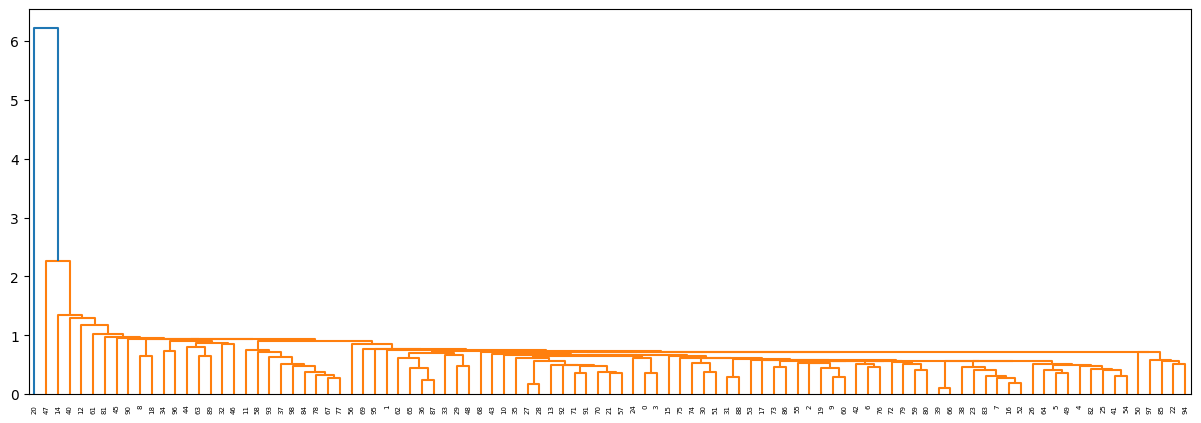

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# 1. Ближайший сосед
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['internet', 'import', 'hightech', 'mobile']], 'single'))
# цепочки => не подходит

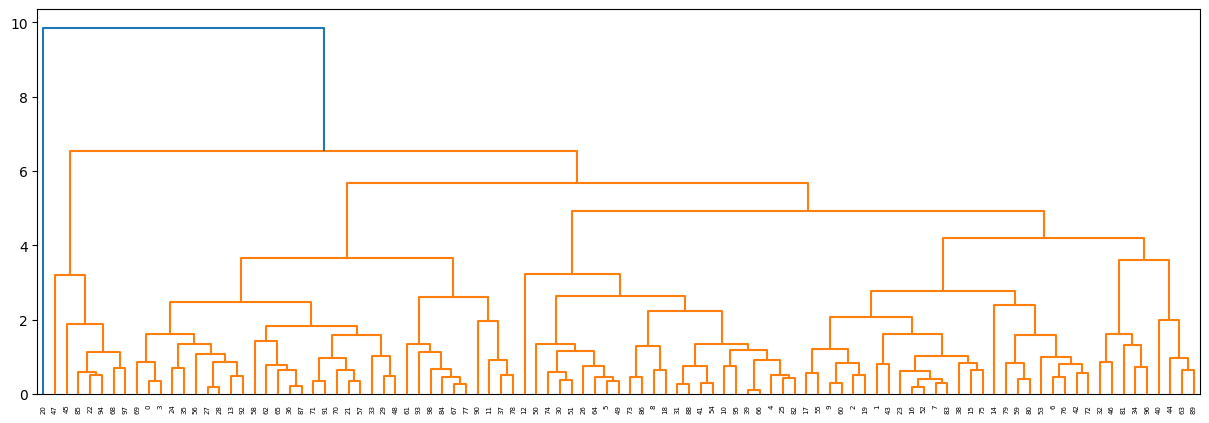

In [24]:
# 2. Дальние связи
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['internet', 'import', 'hightech', 'mobile']], 'complete'))
# цепочек нет, что хорошо

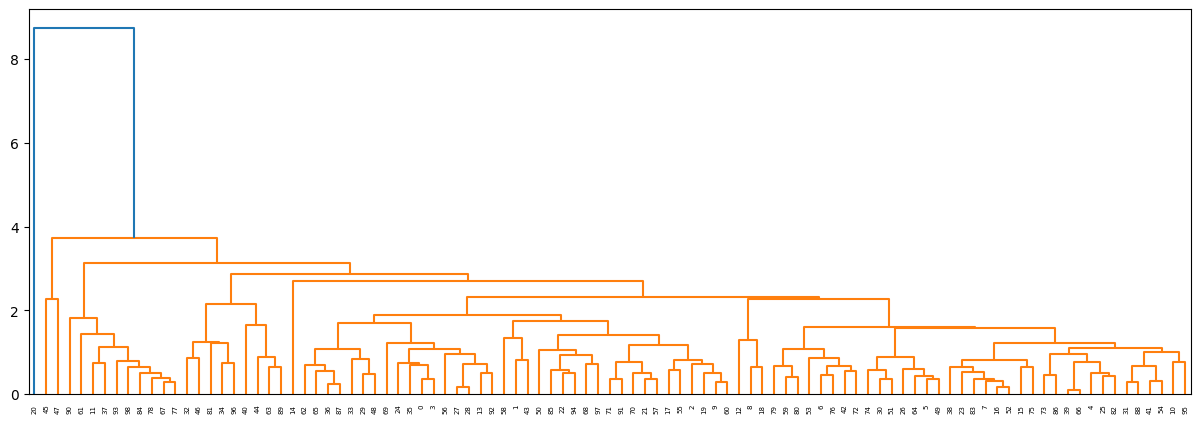

In [25]:
# 3. Межгрупповые связи
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['internet', 'import', 'hightech', 'mobile']], 'average'))
# цепочек больше, чем в варианте 2, поэтому такой не будем брать

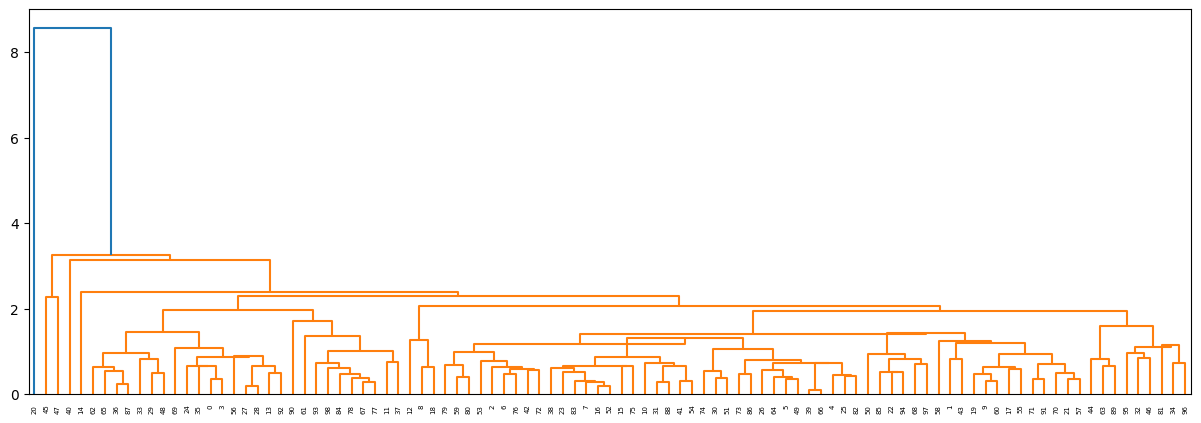

In [26]:
# 4. Центроидная кластеризация
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['internet', 'import', 'hightech', 'mobile']], 'centroid'))
# и тут тоже больше цепочек, не будем брать

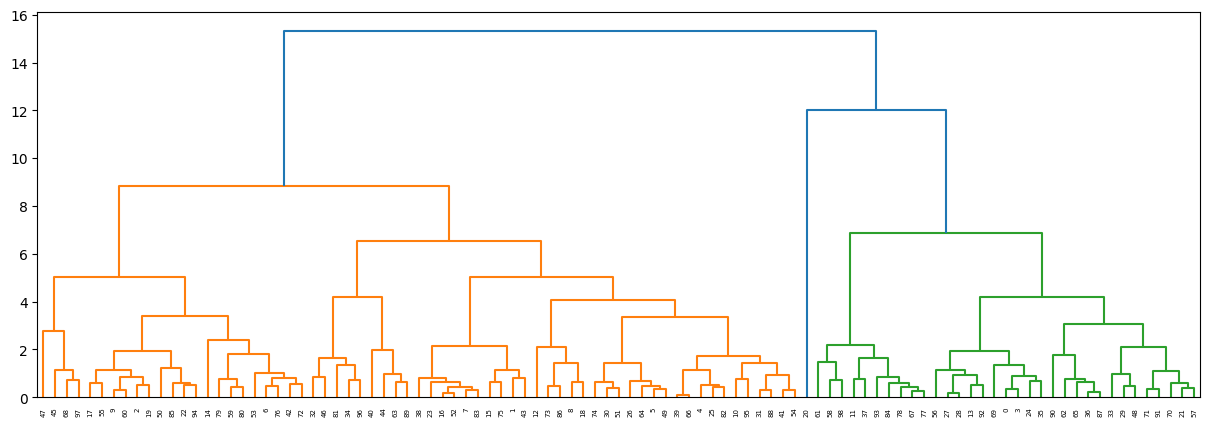

In [27]:
# 5. Метод Варда
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['internet', 'import', 'hightech', 'mobile']], 'ward'))
# цепочек меньше всего + больше показательных кластеров, поэтому выберем этот метод

При этом на всех диаграммах видно, что 20-й объект является выбросом, тогда его уберём из рассмотрения и ещё раз построим дендрограмму

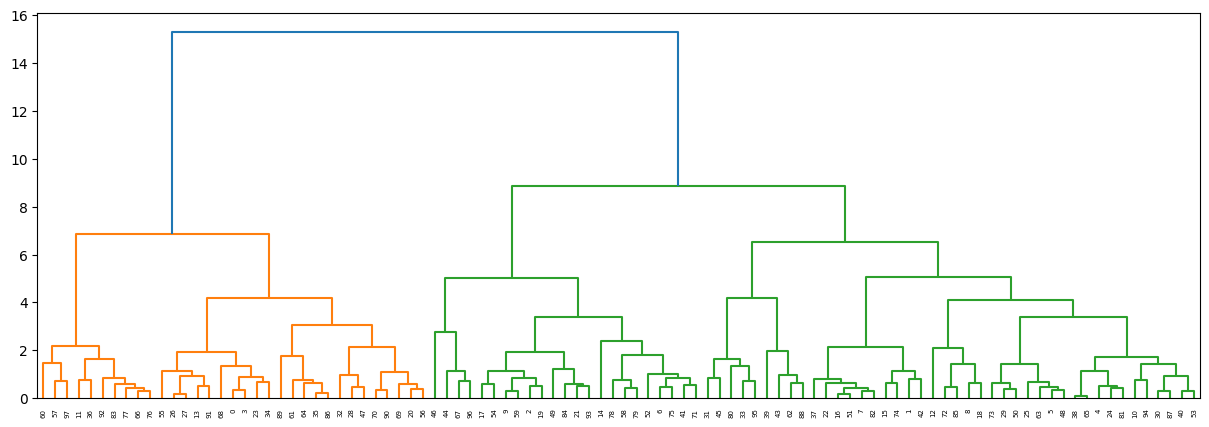

In [28]:
df1 = df1.drop(index=df1.index[20])
plt.figure(figsize=(15, 5))
dn = dendrogram(linkage(df1[['internet', 'import', 'hightech', 'mobile']], 'ward'))

### Число кластеров
При помощи цикла найдём оптимальное число кластеров при помощи индекса Калински-Харабаша. Для каждого количества посчитаем его и выберем тот вариант, где значение максимально

In [29]:
from sklearn.metrics import calinski_harabasz_score
variants = linkage(df1[['internet', 'import', 'hightech', 'mobile']], method='ward', metric='euclidean')
for k in range (2, 20):
    labels = fcluster(variants, t=k, criterion='maxclust')
    print('Число кластеров: {}, индекс {}'.format(k, calinski_harabasz_score(df1[['internet', 'import', 'hightech', 'mobile']], labels)))

Число кластеров: 2, индекс 55.622669615536495
Число кластеров: 3, индекс 45.52032799534326
Число кластеров: 4, индекс 40.355040771143855
Число кластеров: 5, индекс 39.52535748960404
Число кластеров: 6, индекс 37.28539881830661
Число кластеров: 7, индекс 36.99366165166571
Число кластеров: 8, индекс 36.01786198426849
Число кластеров: 9, индекс 36.076237938553234
Число кластеров: 10, индекс 36.87639949233261
Число кластеров: 11, индекс 36.76780171937693
Число кластеров: 12, индекс 37.2421452823359
Число кластеров: 13, индекс 37.51942909565915
Число кластеров: 14, индекс 37.57241515928464
Число кластеров: 15, индекс 37.11601252020398
Число кластеров: 16, индекс 36.498460700590236
Число кластеров: 17, индекс 36.03483737854801
Число кластеров: 18, индекс 35.818900715331864
Число кластеров: 19, индекс 35.83162135718718


Видим, что оптимальный вариант - 2 кластера. Тогда разобьём наши данные по кластерам, добавив соответствующий столбец

In [30]:
df1['cluster_id'] = fcluster(variants, t=2, criterion='maxclust')
df1

,country_name,country_code,internet,secure,export,import,telephone,hightech,mobile,cluster_id
1,Albania,ALB,0.068008,37.727137,25.303169,-1.732156,7.091628,-0.313982,-0.426680,1
2,Algeria,DZA,-0.960472,2.546228,59.256825,1.297832,8.041628,-0.314180,-0.209118,2
7,Argentina,ARG,0.320397,63.293537,49.760189,-0.001197,24.006501,-0.291696,0.800910,2
8,Armenia,ARM,-0.137401,49.043779,25.748135,-1.672538,18.443622,-0.314046,-0.139952,1
9,Aruba,ABW,1.111076,279.144086,14.764849,0.396284,33.689804,-0.314200,0.533132,2
...,...,...,...,...,...,...,...,...,...,...
203,Ukraine,UKR,-0.506434,65.467209,46.889568,-0.431394,21.615455,-0.292564,0.804684,2
205,United Kingdom,GBR,1.248153,1382.567461,47.854272,0.629975,52.648762,0.769674,0.206966,2
206,United States,USA,0.531778,1649.900277,45.216431,0.270570,37.520957,2.095889,-0.060095,2
207,Uruguay,URY,0.123308,106.657186,25.607852,-1.062826,32.257492,-0.310063,1.334170,2


### Описательная статистика

In [31]:
df1.groupby('cluster_id')[['internet', 'import', 'hightech', 'mobile']].mean()

,internet,import,hightech,mobile
cluster_id,,,,
1,-1.001169,-0.835009,-0.261056,-0.761256
2,0.515420,0.442742,0.004224,0.399701


Для первого типа характерно малое количество пользователей интернета и подписчиков на сотовую мобильную связь, небольшой экспорт высокотехнологичных продуктов (точнее небольшая сумма выручки в долларах) и импорт (в среднем). Это говорит о том, что страны из этого кластера не очень технологически развиты

Для второго типа всё наоборот: большое количество пользователей интернета и подписчиков на сотовую мобильную связь, большой экспорт высокотехнологичных продуктов (точнее большая сумма выручки в долларах) и импорт (в среднем). Это говорит о том, что страны из этого кластера технологически развиты

### Названия кластеров
1. Технологически слабо развитые страны
2. Технологически развитые страны

### Причина появления такой кластерной структуры и соответствие ожиданиям
Тут всё было ожидаемо, потому что в целом всегда можно разбить какие-то объекты относительно каких-то средних значений на те, которые будут "проседать" по ним и те, которые будут выше них

<font color='red'> получилась не самая удачная кластерная структура, как ты и написала, она просто разбивает на два по какому-то значению, если поиграться с переменными, можно поинтереснее выбить кластеры</font>

## Задание 2

В файле Video_Games_Sales.csv содержаться данные о продажах видеоигр.
Источник: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

В файле следующие переменные::
    
    - Name: The game’s name
    - Platform: Platform of the game’s release (i.e. PC, PS4, etc.)
    - Year_of_Release: Year of the game's release
    - Genre: Genre of the game
    - Publisher: Publisher of the game
    - NA_Sales: Sales in North America (in millions)
    - EU_Sales: Sales in Europe (in millions)
    - JP_Sales: Sales in Japan (in millions)
    - Other_Sales: Sales in the rest of the world (in millions)
    - Global_Sales: Total worldwide sales.
    - Critic_score: Aggregate score compiled by Metacritic staff
    - Criticcount: The number of critics used in coming up with the Criticscore
    - User_score: Score by Metacritic's subscribers
    - Usercount: Number of users who gave the userscore
    - Developer: Party responsible for creating the game
    - Rating: The ESRB ratings


Проведите кластерный анализ на основе алгоритмов k-средних или DBSCAN с использованием не менее 4-х метрических переменных. Выполните следующие пункты:

    1.Обоснуйте выбор переменных кластеризации.

    2.Выберите один из двух алгоритмов кластеризации (k-средних или DBSCAN) и обоснуйте свой выбор.

    3.Определите число кластеров, объясните своё решение.

    4.Опишите получившиеся кластеры с помощью описательной статистики. Нужно не просто рассчитать статистики в таблицах, но детально описать полученные результаты.

    5.Дайте названия кластерам и обоснуйте их.

    6.Почему получилась именно такая кластерная структура? Полученные результаты соответствуют вашем изначальным предположениям или оказались неожиданными?


Обратите внимание, что все пункты задания должны сопровождаться _выполненным_ фрагментом кода!

### Выбор переменных для кластеризации
Нам бы хотелось взять какие-то переменные, можно взять продажи в разных странах и оценки критиков. Так хорошо будет сделать, поскольку сможем выявить популярные игры (которые часто покупают), средне-популярные, малопопулярные и тп
- NA_Sales: Sales in North America (in millions)
- EU_Sales: Sales in Europe (in millions)
- JP_Sales: Sales in Japan (in millions)
- Other_Sales: Sales in the rest of the world (in millions)
- Critic_score: Aggregate score compiled by Metacritic staff

### Выбор алгоритма кластеризации
Лучше взять алгоритм k-means (k-средних), поскольку данных тут довольно много, а он как раз является более эффективным по сравнению с DBSCAN

<font color='red'> а где всё (((((</font>

# Этот файл нужно сохранить как Notebook (.ipynb) и загрузить в Smart LMS до 13:00 30 октября.